In [194]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [270]:
#simulate takes two arguments: the starting populations of A1 and A2. 
#it returns a time list and state log for the simulation.
def simulate(a1_start, a2_start):

    #initialize k values
    k1 = 1
    k2 = 1
    kd = 1
    k3 = 100
    k4 = 1
    k5 = 100

    #initialize reaction array, where each row is an operation to be executed on the population list
    op_array = np.array([[0, 0, 1, 0, 0], #A_1 -> A_1 + E; index 0
               [0, 0, 0, 1, 0], #A_2 -> A_2 + S; index 1
               [-1, 0, 0, 0, 1], #E + A_1 -> E + A_1*; index 2
               [0, 0, 1, 0, 0], #A_1* -> E + A_1*; index 3
               [-1, 0, 0, 0, 0], #S + A_1 -> S + A_1(inactive); index 4
               [0, 0, 0, -1, 0], #S death; index 5
               [0, 0, -1, 0, 0]]) #E death; index 6

    #initialize population list
    pop_lst = np.array([[a1_start, #index 0 is A_1
               a2_start, #index 1 is A_2
               0, #index 2 is E
               0, #index 3 is S
               0]]) #index 4 is A_1*

    #initialize propensity list
    prop_lst = np.array([k1 * pop_lst[0][0], #A_1 -> A_1 + E
               k2 * pop_lst[0][1], #A_2 -> A_2 + S
               k3 * pop_lst[0][2] * pop_lst[0][0], #E + A_1 -> E + A_1*
               k4 * pop_lst[0][4], #A_1* -> E + A_1*
               k5 * pop_lst[0][3] * pop_lst[0][0], #S + A_1 -> S + A_1(inactive)
               kd * pop_lst[0][3], #S death
               kd * pop_lst[0][2]]) #E death

    prop_sum = sum(prop_lst)

    #normalize to create probability list
    prob_lst = prop_lst / prop_sum
    
    #initialize time and logs
    time = 0
    time_lst = [0]
    state_log = np.array([[0, 0, 0, 0, 0]])

    #while the population of A1 > 0, the simulation continues
    while (pop_lst[0][0]) > 0:
        #sample time
        H = np.random.exponential(1/prop_sum)
        
        #sample reaction
        rx_id = np.random.choice( a = [0, 1, 2, 3, 4, 5, 6], size = 1, p = prob_lst)
        reaction = op_array[rx_id]

        #increment time
        time += H;

        #update pop_lst using sampled reaction
        pop_lst += reaction

        #update propensity list; could be made more efficient with conditionals
        prop_lst = np.array([k1 * pop_lst[0][0],
            k2 * pop_lst[0][1],
            k3 * pop_lst[0][2] * pop_lst[0][0],
            k4 * pop_lst[0][4],
            k5 * pop_lst[0][3] * pop_lst[0][0],
            kd * pop_lst[0][3],
            kd * pop_lst[0][2]])

        #update probability list
        prop_sum = sum(prop_lst)
        prob_lst = prop_lst / prop_sum

        #record data
        time_lst.append(time)
        state_log = np.concatenate((state_log, pop_lst))
        #end loop
    
    return ([time_lst, state_log])

In [284]:
final_A1_star_lst = []
#simulate 1000x for A1 = 10 and A2 = 10
for i in range(1000):
    test = simulate(10, 10)
    #below line appends the final value to a running list
    final_A1_star_lst.append(test[1][: , 4][len(test[1][: , 4]) - 1])

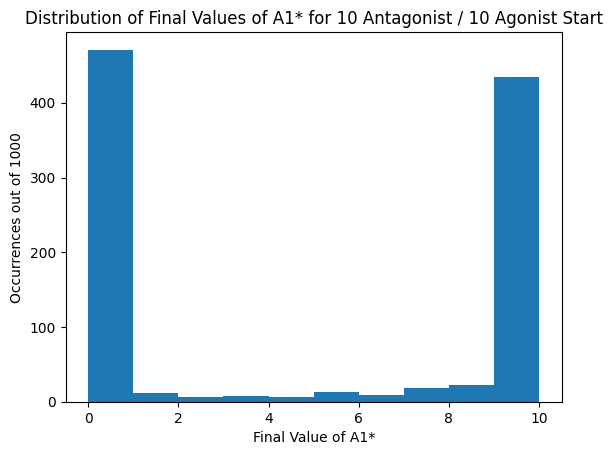

In [285]:
#Plot
plot = plt.hist(final_A1_star_lst)
title = plt.title("Distribution of Final Values of A1* for 10 Antagonist / 10 Agonist Start")
xlabel = plt.xlabel("Final Value of A1*")
ylabel = plt.ylabel("Occurrences out of 1000")

Starting with 10 antagonists and 10 agonists, we see that the final steady-state value for A1* is usually either 0 or 10. This can be explained by the high values of k3 and k5 in this simulation; if even one enzyme gets created early, it becomes very likely that the enzyme will convert A1 to its protected form. The amount of A2 does not compare to the value of k3 when calculating the reaction probabilities. If, however, an enzyme does not get made, the inactivation of A1 via S will degrade the chance of enzyme production, making the 0 outcome more likely after each event an enzyme is not produced.

In [286]:
final_A1_star_lst = []
#simulate 1000x for A1 = 1000 and A2 = 1000
for i in range(1000):
    test = simulate(1000, 1000)
    final_A1_star_lst.append(test[1][: , 4][len(test[1][: , 4]) - 1])

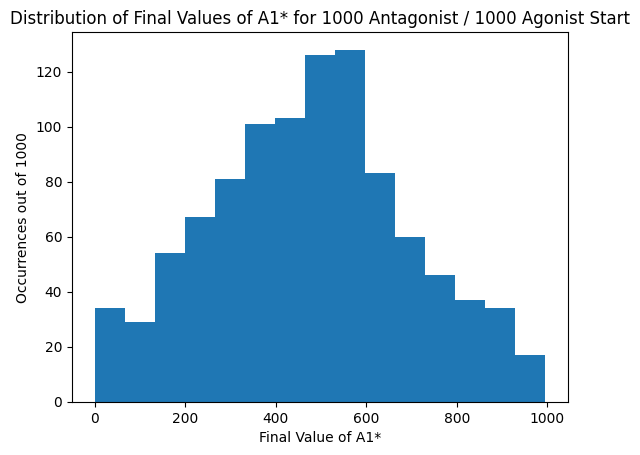

In [287]:
#Plot
plot = plt.hist(final_A1_star_lst, bins=15)
title = plt.title("Distribution of Final Values of A1* for 1000 Antagonist / 1000 Agonist Start")
xlabel = plt.xlabel("Final Value of A1*")
ylabel = plt.ylabel("Occurrences out of 1000")

The distribution of final values for A1* after a 1000 antagonist / 1000 agonist start looks roughly Gaussian. The reason why this distribution is so different from the first, and the key difference between a large starting population and a small starting population, is the amount of time the system has to get an approximately equal amount of S and E, at which point the rates of inactivation and protection become equal.

Since the probability of degradation and protection become equal earlier relative to the size of the A1 population, the system tends to reach a A1* state closer to the mean.

The rate laws would predict the steady-state value of A1* to be 5 for the first example and 500 for the second. The reason is that the mass action law is the average behavior of the chemical master equation; it does not account for divergent cases like the first example.